In [1]:
import pandas as pd

In [2]:
df_collection=pd.read_csv("../../data/processed/all_data_collection.csv")

In [3]:
df_collection

,Date,tech_index_daily_pro_change,cop_daily_pro_change,gold_daily_pro_change,silv_daily_pro_change,pal_daily_pro_change,plat_daily_pro_change,crude_oil_daily_pro_change,fed_dff_daily
0,2014-01-02,-0.751953,-0.352994,-0.105993,3.539095,0.828394,1.134643,-3.106599,0.08
1,2014-01-03,-0.522898,-0.783676,0.000000,0.000000,0.130092,0.683469,-1.550712,0.08
2,2014-01-06,-0.022589,0.134128,1.044727,-0.124205,0.998359,0.155565,-0.564070,0.08
3,2014-01-07,0.905810,0.000000,-0.678514,-1.571905,0.433311,-0.070602,0.256877,0.07
4,2014-01-08,-0.198846,-0.506028,-0.333442,-1.253348,-0.458406,-0.084782,-1.430554,0.07
...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,0.014143,0.886590,0.713997,-0.130653,7.209738,0.382858,-0.753162,4.83
2564,2024-10-25,0.589392,-0.073233,0.208295,-0.038653,2.969432,-0.168621,2.162085,4.83
2565,2024-10-28,0.079416,0.000000,0.051054,0.666270,-98.982188,0.847772,-6.124737,4.83
2566,2024-10-29,0.999780,-0.073287,0.918501,1.273490,9891.666667,1.759734,-0.253807,4.83


In [4]:
lst_values_name=df_collection.columns

In [5]:
lst_all_pram=lst_values_name[2:]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
lst_tech_daily=df_collection["tech_index_daily_pro_change"].values

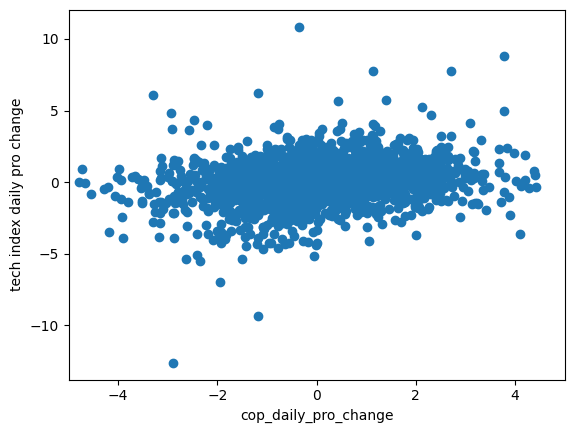

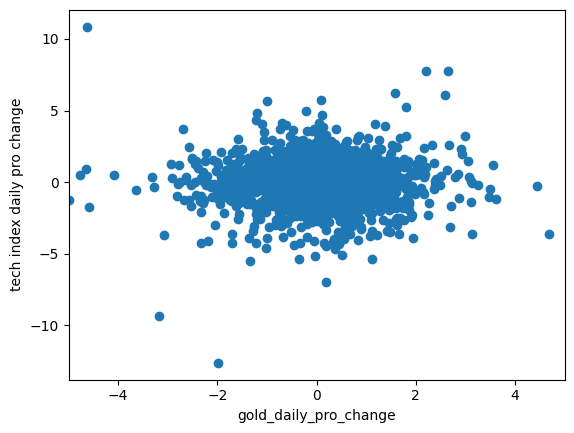

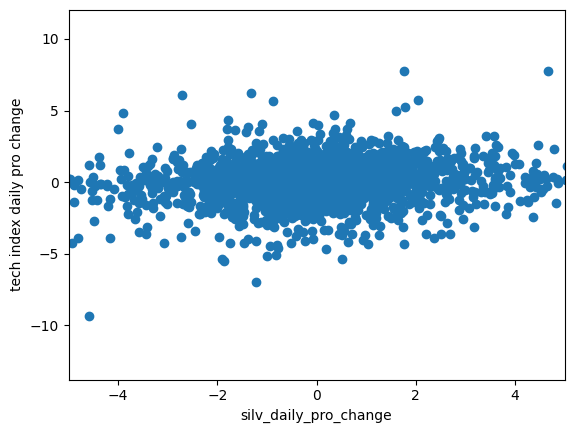

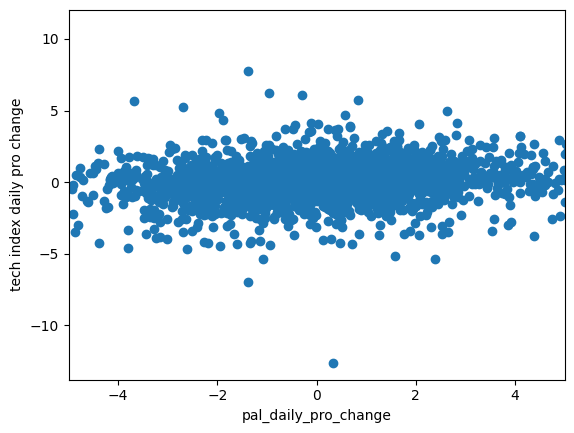

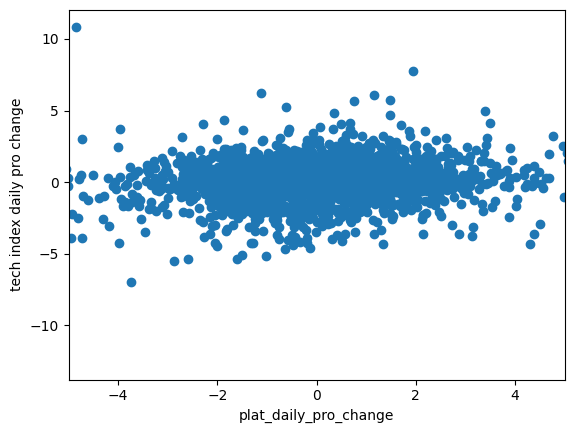

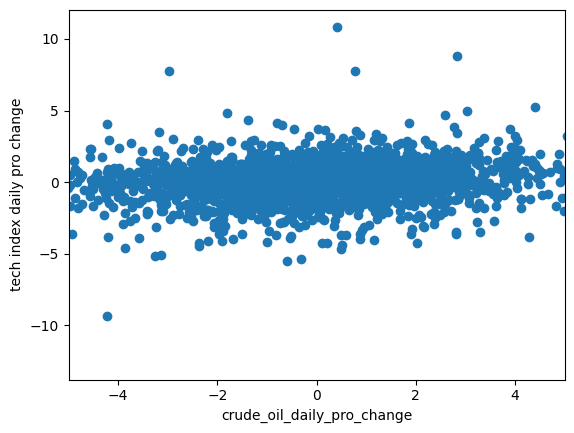

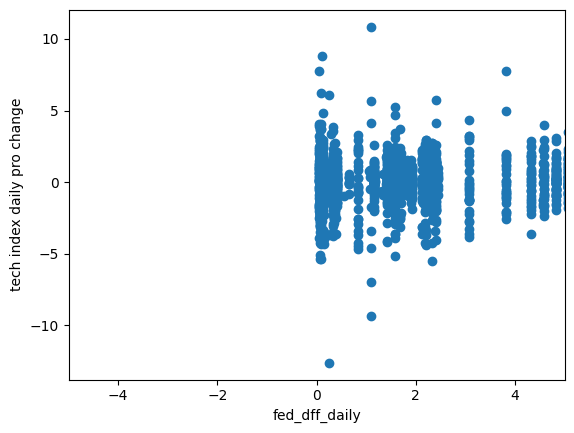

In [8]:
for pram in lst_all_pram: 
    plt.scatter(x=df_collection[pram],y=lst_tech_daily)
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    plt.xlim(-5,5)
    
    plt.show()

HMMMMMMMM, not very clear trends. 

In [9]:
import numpy as np

In [37]:
from interpret.glassbox import ExplainableBoostingRegressor

In [18]:
lst_prem_bounds={'cop_daily_pro_change': (-5,5),
       'gold_daily_pro_change':(-5,5), 'silv_daily_pro_change':(-5,5),
       'pal_daily_pro_change':(-5,5), 'plat_daily_pro_change':(-5,5),
       'crude_oil_daily_pro_change':(-5,5), 'fed_dff_daily':(-1,6)}

In [19]:
lst_targ_bounds={'cop_daily_pro_change': (-1,1),
       'gold_daily_pro_change':(-0.25,0.25), 'silv_daily_pro_change':(-0.5,0.5),
       'pal_daily_pro_change':(-0.5,0.5), 'plat_daily_pro_change':(-0.5,1),
       'crude_oil_daily_pro_change':(-0.75,0.75), 'fed_dff_daily':(-0.25,0.25)}

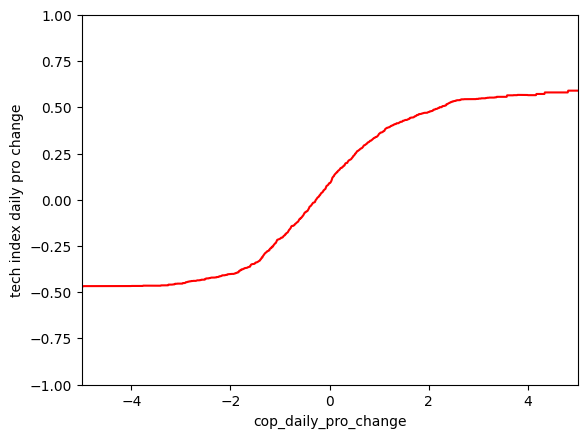

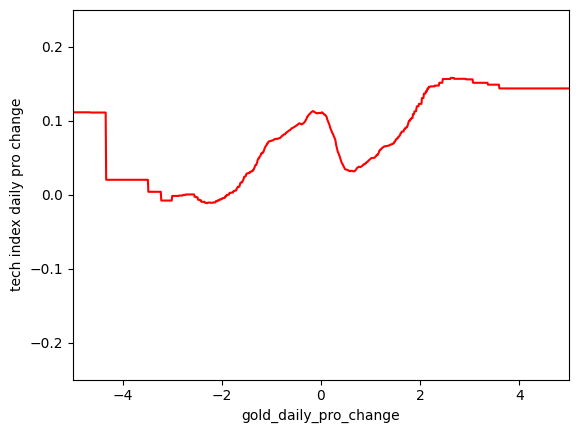

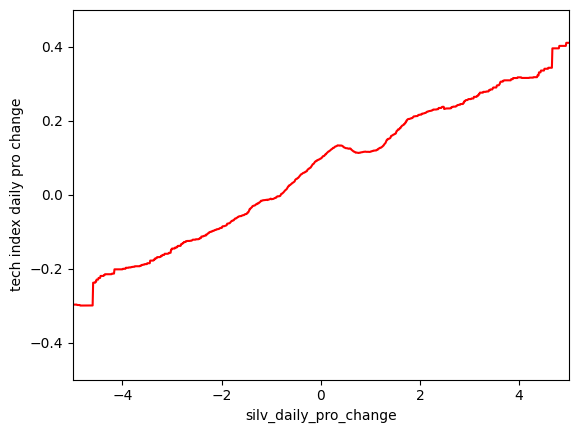

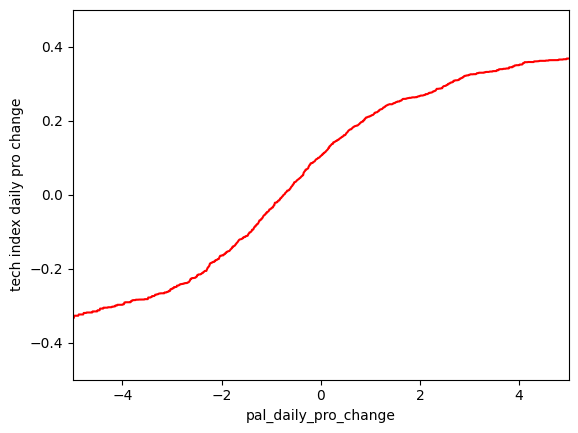

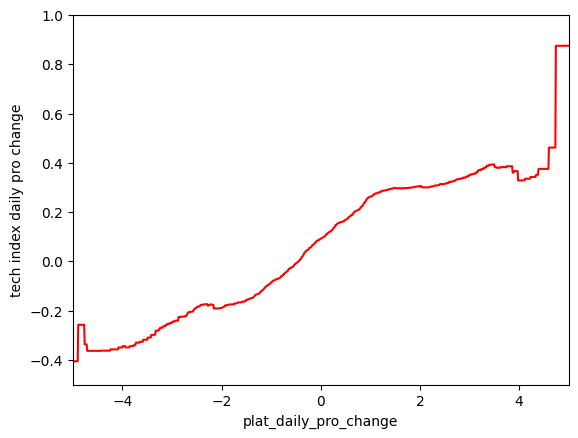

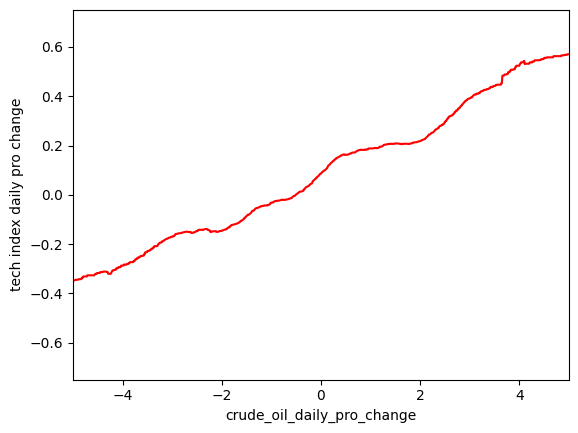

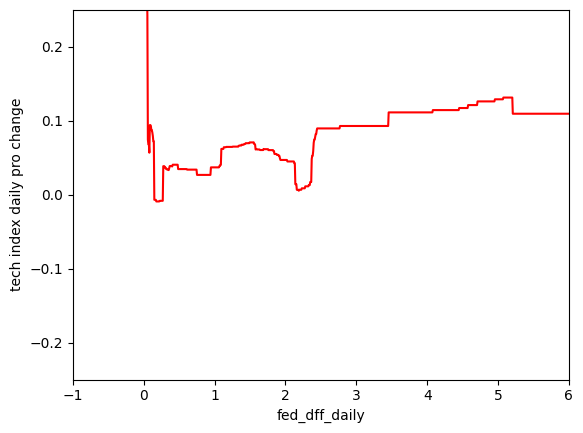

In [85]:
for pram in lst_all_pram: 
    ebm=ExplainableBoostingRegressor()
    ebm.fit(X=df_collection[pram].values.reshape(-1,1),y=lst_tech_daily.reshape(-1,1))
    pred_in=np.linspace(lst_prem_bounds[pram][0],lst_prem_bounds[pram][1],num=1000)
    pred=ebm.predict(pred_in)
    
    # plt.scatter(x=df_collection[pram],y=lst_tech_daily)
    
    plt.plot(pred_in, pred,c="r")
    
    # plt.scatter(x=df_collection[pram],y=lst_tech_daily)
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    plt.xlim(lst_prem_bounds[pram])
    plt.ylim(lst_targ_bounds[pram])
    
    plt.show()

There is certainly some kind of trend, just that the target is "too small". 

I hope I could find the prediction interval. I could not find a way to do this with EBM (with pre-made method), so I am going to try (Linear)GAM instead (tho the method of prediction interval change according to the change of parameter in consideration is unclear to me). 

In [10]:
from pygam import LinearGAM

In [ ]:
gam=LinearGAM(n_splines=50)

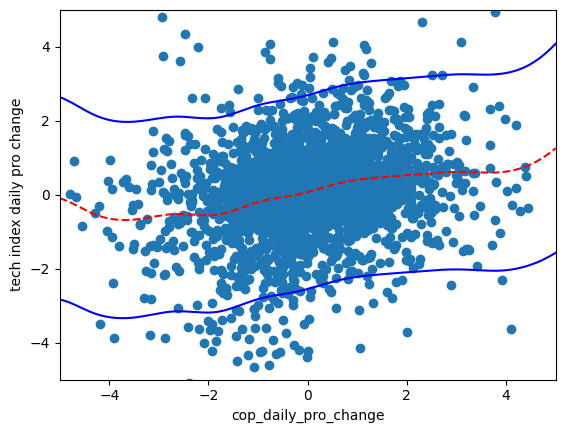

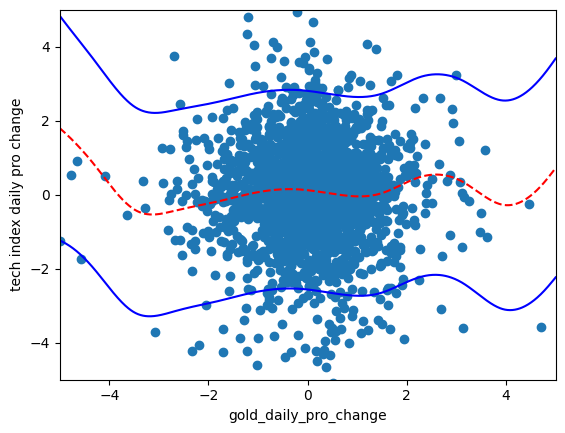

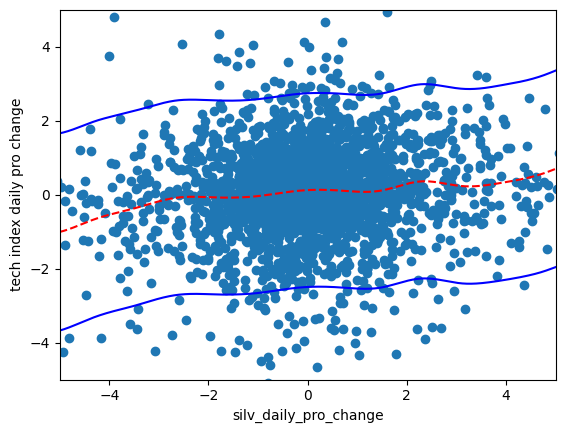

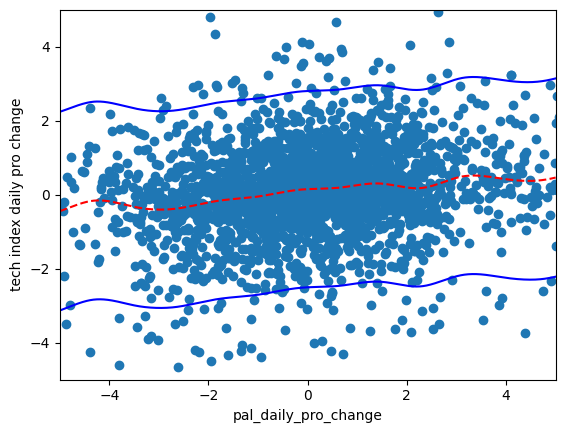

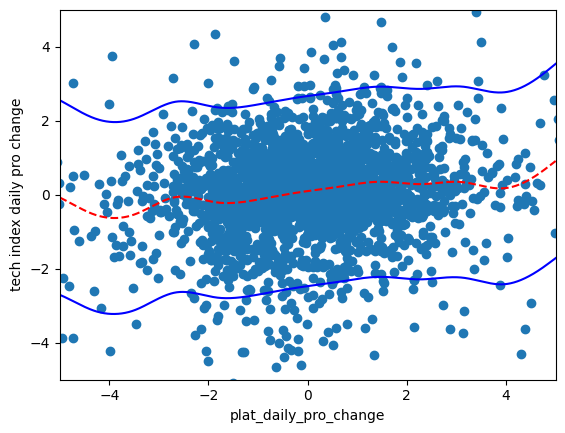

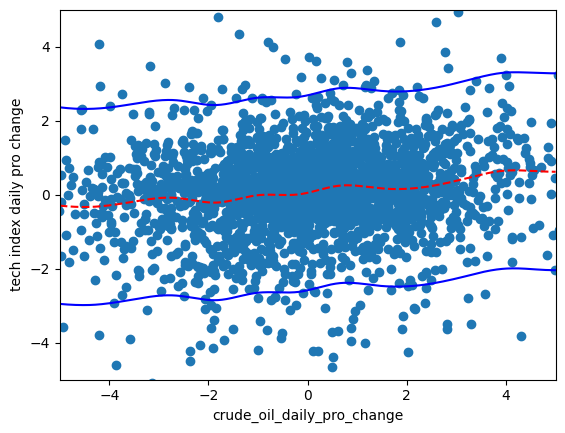

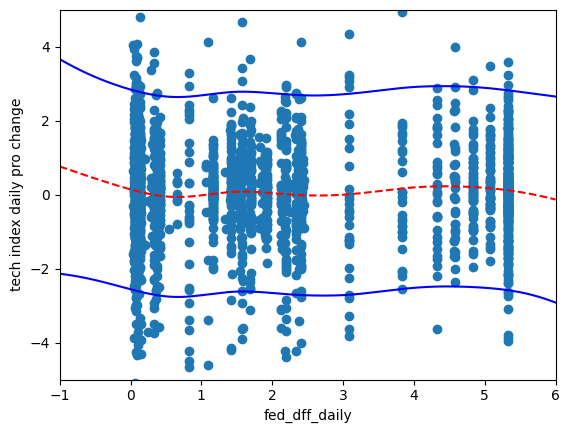

In [22]:
for pram in lst_all_pram: 
    gam.fit(X=df_collection[pram].values, y=lst_tech_daily)
    pred_in=np.linspace(lst_prem_bounds[pram][0],lst_prem_bounds[pram][1],1000)
    pred=gam.predict(pred_in)
    pred_95=gam.prediction_intervals(pred_in,width=0.95)
    
    plt.scatter(x=df_collection[pram],y=lst_tech_daily)
    plt.plot(pred_in,pred,"r--")
    plt.plot(pred_in,pred_95,color="b")
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    plt.xlim(lst_prem_bounds[pram])
    plt.ylim(-5,5)
    
    plt.show()